In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
%matplotlib inline

# Лабораторна робота №3
## Визначення показників захищеності інформації при несанкціонованому доступі

### Сакевич Руслан

In [2]:
a1 = 0.0007
a2 = 0.0007
b1 = 0.0025
b2 = 0.0001
c =  0.00295
d1 = 0.0005
d2 = 0.00385
e =  0.00325

## Завдання 1

In [3]:
P = lambda l, t: 1 - np.exp(-l * t)

t = 500
print('P(A1) = {}'.format(P(a1, t)))
print('P(A2) = {}'.format(P(a2, t)))
print('P(B1) = {}'.format(P(b1, t)))
print('P(B2) = {}'.format(P(b2, t)))
print('P(C) = {}'.format(P(c, t)))
print('P(D1) = {}'.format(P(d1, t)))
print('P(D2) = {}'.format(P(d2, t)))
print('P(E) = {}'.format(P(e, t)))

P(A1) = 0.29531191028128656
P(A2) = 0.29531191028128656
P(B1) = 0.7134952031398099
P(B2) = 0.048770575499285984
P(C) = 0.7712212729547775
P(D1) = 0.22119921692859512
P(D2) = 0.8541242431437727
P(E) = 0.8030883247958059


## Завдання 2

In [4]:
print('P(D1 + E) = {}'.format(P(d1, t) + P(e, t) - P(d1, t)*P(e, t)))
print('P(D2 + E) = {}'.format(P(d2, t) + P(e, t) - P(d2, t)*P(e, t)))
print('P(C*B1*A1) = {}'.format(P(c, t)*P(b1, t)*P(a1, t)))
print('P(C*B2*A2) = {}'.format(P(c, t)*P(b2, t)*P(a2, t)))
print('P(C*B1*A1 + C*B2*A2) = {}'.format(1 - (1 - P(c, t)*P(b1, t)*P(a1, t))*(1 - P(c, t)*P(b2, t)*P(a2, t))))
print('P(E + C*B1*A1 + C*B2*A2) = {}'.format(1 - (1 - P(e, t))*(1 - P(c, t)*P(b1, t)*P(a1, t))*(1 - P(c, t)*P(b2, t)*P(a2, t))))

P(D1 + E) = 0.8466450331550716
P(D2 + E) = 0.9712753603457606
P(C*B1*A1) = 0.16249912283665038
P(C*B2*A2) = 0.01110753892107059
P(C*B1*A1 + C*B2*A2) = 0.17180169642617305
P(E + C*B1*A1 + C*B2*A2) = 0.8369180846420061


## Завдання 3

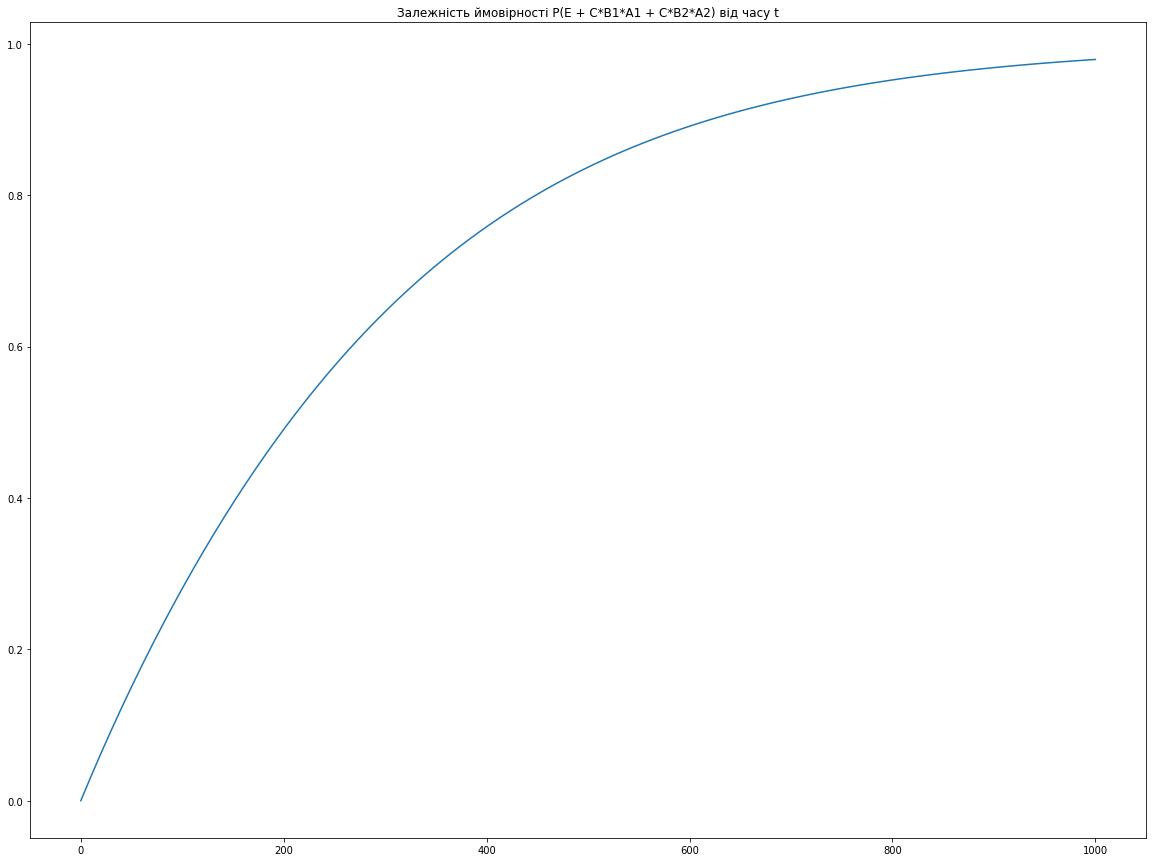

In [5]:
t = np.linspace(0.001, 1000, 100)
p = lambda t: 1 - (1 - P(e, t))*(1 - P(c, t)*P(b1, t)*P(a1, t))*(1 - P(c, t)*P(b2, t)*P(a2, t))

plt.figure(figsize=(20, 15))
plt.plot(t, p(t))
plt.title('Залежність ймовірності P(E + C*B1*A1 + C*B2*A2) від часу t')
plt.show()

## Завдання 4

Зменшимо найменшу інтенсивність **B2** з 0.0001 до 0.000025 і подивимося як зміниться ймовірність попередньої події

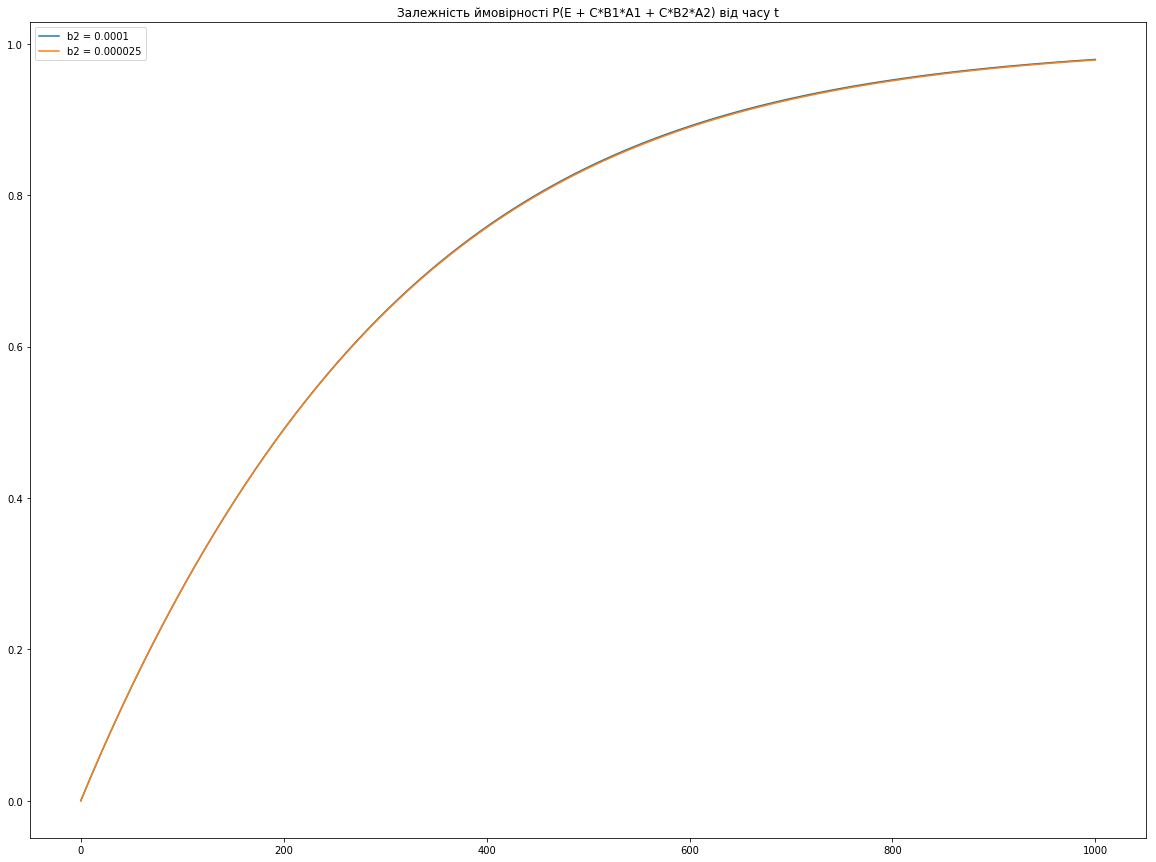

In [6]:
p = lambda b2, t: 1 - (1 - P(e, t))*(1 - P(c, t)*P(b1, t)*P(a1, t))*(1 - P(c, t)*P(b2, t)*P(a2, t))

plt.figure(figsize=(20, 15))
plt.plot(t, p(b2, t), label='b2 = 0.0001')
plt.plot(t, p(b2 / 4, t), label='b2 = 0.000025')
plt.legend()
plt.title('Залежність ймовірності P(E + C*B1*A1 + C*B2*A2) від часу t')
plt.show()

Як бачимо криві дуже схожі, і помітити різницю на графіку майже не можливо

## Завдання 5

Для кожного значення **t** порахуємо в скільки разів треба зменшити інтенсивності щоб ймовірність зменшилась вдвічі

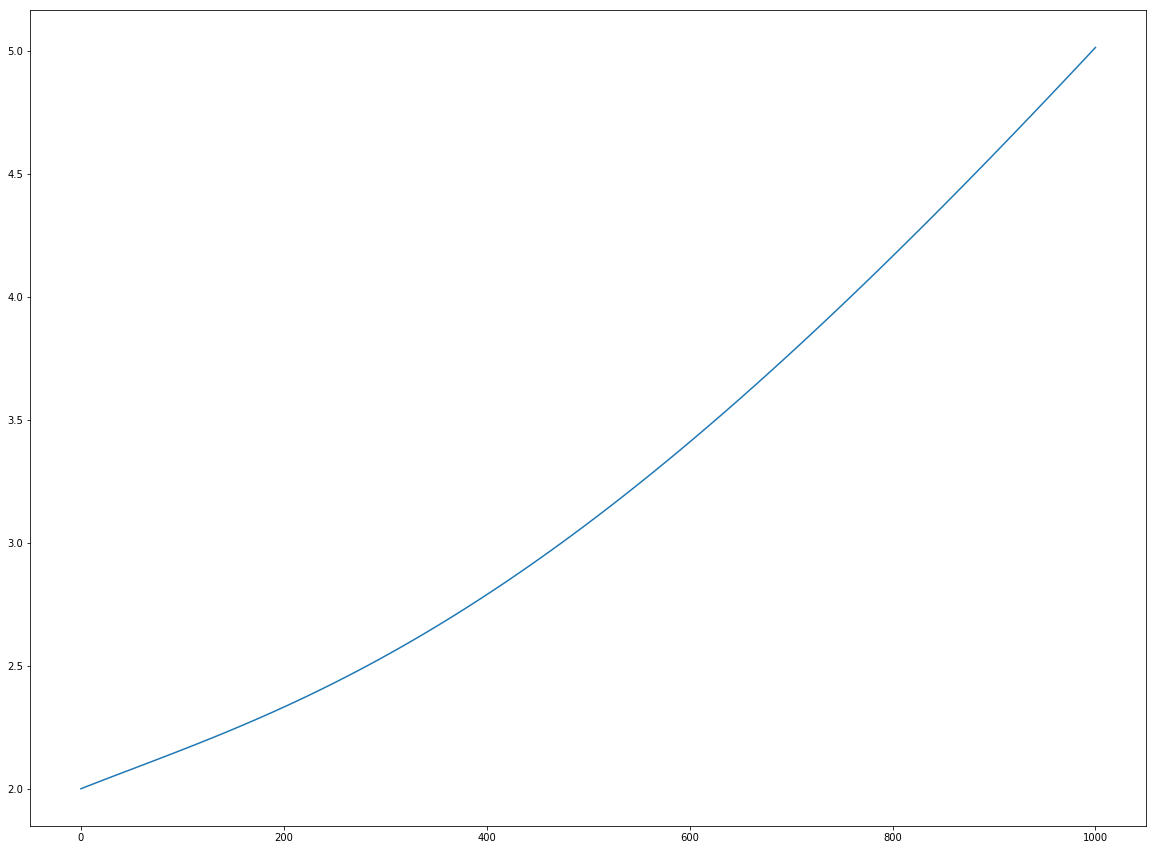

In [7]:
p = lambda times, t: 1 - (1 - P(e/times, t))*(1 - P(c/times, t)*P(b1/times, t)*P(a1/times, t))*(1 - P(c/times, t)*P(b2/times, t)*P(a2/times, t))

ts = [bisect(lambda times: p(1, time) / p(times, time) - 2, 1, 10) for time in t]
plt.figure(figsize=(20, 15))
plt.plot(t, ts)
plt.show()